In [1]:
!pip install Sastrawi tweet-preprocessor textblob wordcloud nltk
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis Presiden 2024/prabowo.csv")
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:10:46 +0000 2023,1735512698522382615,"@andre_rosiade eh botak, bilang ke capres lu d...",0,0,0,0,in,1718575798792355840,1735204525517177333,Yhafidzun15,https://twitter.com/Yhafidzun15/status/1735512...
1,1,Fri Dec 15 04:10:46 +0000 2023,1735512698086166538,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",0,0,0,0,in,1101762919,1735512698086166538,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126980...
2,2,Fri Dec 15 04:10:43 +0000 2023,1735512687281573985,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",0,0,0,0,in,1101762919,1735512687281573985,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126872...
3,3,Fri Dec 15 04:10:41 +0000 2023,1735512676552597739,@kurawa jokowi hebat....setuju tapi melihat pe...,0,0,0,0,in,1069905602,1735205387757146512,romobing,https://twitter.com/romobing/status/1735512676...
4,4,Fri Dec 15 04:10:38 +0000 2023,1735512663923490883,Prabowo prediksi AHY akan jadi pemimpin di tin...,0,0,0,0,in,1101762919,1735512663923490883,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126639...


In [3]:
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,"@andre_rosiade eh botak, bilang ke capres lu d...",Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,@kurawa jokowi hebat....setuju tapi melihat pe...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,"@kompascom Memang tidak mudah, sekarang masyar...",HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,Visi Prabowo - Gibran membawa harapan baru bag...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,@supersaiyaindo @ch_chotimah2 Pembenaran akan ...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,Prabowo Gibran berkomitmen untuk mengoptimalka...,clara144495,Fri Dec 15 03:56:00 +0000 2023


## Data Cleaning

In [4]:
df = df.drop_duplicates(subset=['full_text'])
df = df.dropna()

In [5]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)

  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)
df

,full_text,username,created_at
0,eh botak bilang ke capres lu dulu dia ngobrol ...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,Elektabilitas tembus 45 persen AHY Prabowo bis...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,Beri pujian ke AHY Prabowo Pemimpin yang hebat...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju tapi melihat penampilan pra...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,Memang tidak mudah sekarang masyarakat mau tau...,HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,Visi Prabowo Gibran membawa harapan baru bagi ...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,Pembenaran akan selalu adatapi jika anda mau m...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,Prabowo Gibran berkomitmen untuk mengoptimalka...,clara144495,Fri Dec 15 03:56:00 +0000 2023


In [6]:
df['full_text'] = df['full_text'].str.lower()

## Preprocessing data

In [8]:
# Normalisasi
norm = {" yg ": " yang ", " ganjar ":" ", "anies ": " ", ' nggak ':' tidak ', ' gak ':' tidak ' ,' bangetdari ':' banget dari '
,'vibes ':' suasana ' ,'mantab ':' keren ',' benarsetuju ': ' benar setuju ',' ganjarmahfud ':' ganjar mahfud ',
        ' stylish ':' bergaya ',' ngapusi ':' bohong ',' gede ':' besar ', ' all in ':' yakin ', ' blokkkkk ':' goblok ', ' blokkkk ':' goblok ', ' blokkk ':' goblok ' ,' blokk ':' goblok ' ,
        ' blok ':' goblok ',' ri ':' republik indonesia' ,' kem3nangan ':' kemenangan ', ' sat set ':' cepat ' ,' ala ':' dari ' ,' best ':' terbaik ' ,' mantab ':' mantap ' ,' bgttt ' : ' banget ' ," gue ": " saya ", " hrs ": " harus ", " fixed ":" tetap ", ' blom ':' belum ', ' aing ': ' aku ', ' tehnologi ':' teknologi ', ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika ', ' problem ':' masalah ', ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ', ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ', ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ', ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan ', ' bgt ':' banget ', ' yg ':' yang ', ' ga ': ' tidak ', ' text ':' teks ', ' end ':' selesai ', ' kelen ':' kalian ', ' jd ':' jadi ', ' tuk ':' untuk ', ' kk ':' kakak '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,eh botak bilang ke capres lu dulu dia ngobrol ...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy prabowo bis...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ke ahy prabowo pemimpin yang hebat...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju tapi melihat penampilan pra...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,memang tidak mudah sekarang masyarakat mau tau...,HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,visi prabowo gibran membawa harapan baru bagi ...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,pembenaran akan selalu adatapi jika anda mau m...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,prabowo gibran berkomitmen untuk mengoptimalka...,clara144495,Fri Dec 15 03:56:00 +0000 2023


In [9]:
# Stopwords
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,full_text,username,created_at
0,eh botak bilang capres lu dulu ngobrol ama ba...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,elektabilitas tembus 45 persen ahy prabowo men...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,beri pujian ahy prabowo pemimpin hebat bangsa ...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,jokowi hebatsetuju melihat penampilan prabowo ...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,prabowo prediksi ahy jadi pemimpin tingkat nas...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
498,memang mudah sekarang masyarakat mau tau apa g...,HAPOSANM,Fri Dec 15 03:56:02 +0000 2023
499,visi prabowo gibran membawa harapan baru indon...,istimnatiara,Fri Dec 15 03:56:01 +0000 2023
500,pembenaran selalu adatapi mau merunut kata gib...,DylanBr03197352,Fri Dec 15 03:56:01 +0000 2023
501,prabowo gibran berkomitmen mengoptimalkan pote...,clara144495,Fri Dec 15 03:56:00 +0000 2023


In [10]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[eh, botak, bilang, capres, lu, dulu, ngobrol,..."
1,"[elektabilitas, tembus, 45, persen, ahy, prabo..."
2,"[beri, pujian, ahy, prabowo, pemimpin, hebat, ..."
3,"[jokowi, hebatsetuju, melihat, penampilan, pra..."
4,"[prabowo, prediksi, ahy, jadi, pemimpin, tingk..."
...,...
498,"[memang, mudah, sekarang, masyarakat, mau, tau..."
499,"[visi, prabowo, gibran, membawa, harapan, baru..."
500,"[pembenaran, selalu, adatapi, mau, merunut, ka..."
501,"[prabowo, gibran, berkomitmen, mengoptimalkan,..."


In [11]:
#Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)


eh botak bilang capres lu dulu ngobrol ama bahas komitmen untuk nuntasin dibjakarta lama ngejabat gamau nyalonin bentuk apa pilpres 2019 karenaaa udh komitmen ama pak prabowo mau fokus jakartaaa dulu jadi gubernur gemes gw
elektabilitas tembus 45 persen ahy prabowo menang satu putar mua agusyudhoyono pdemokrat demokrat bareng ahy
beri puji ahy prabowo pimpin hebat bangsa indonesia muj pdemokrat agusyudhoyono demokrat bareng ahy
jokowi hebatsetuju lihat tampil prabowo debat 1 beliau salah pilih orang
prabowo prediksi ahy jadi pimpin tingkat nasional fc agusyudhoyono pdemokrat demokrat bareng ahy
acara hari seru banget prabowo sby djoko suyanto sutanto alumni akabri 19701973 hadir semua dekade08
warga indonesia butuh sosok pimpin seperti mas gibran ada
demokrat sumsel siap menang pasang prabowogibran pilpres 2024 vh pdemokrat agusyudhoyono demokrat bareng ahy
emang parah jijik sih bunuh karakter leceh personal prabowo debat kemaren pak gp aja mo nanya masalah ham pakai kata halus minta m

In [12]:
tokenized.to_csv('/content/drive/MyDrive/Sentiment Analysis Presiden 2024/Hasil prepocessing/hasilpreprocessingprabowo.csv', index=False)
data = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis Presiden 2024/Hasil prepocessing/hasilpreprocessingprabowo.csv',encoding='latin-1')
data

,full_text
0,eh botak bilang capres lu dulu ngobrol ama bah...
1,elektabilitas tembus 45 persen ahy prabowo men...
2,beri puji ahy prabowo pimpin hebat bangsa indo...
3,jokowi hebatsetuju lihat tampil prabowo debat ...
4,prabowo prediksi ahy jadi pimpin tingkat nasio...
...,...
497,memang mudah sekarang masyarakat mau tau apa g...
498,visi prabowo gibran bawa harap baru indonesia ...
499,benar selalu adatapi mau runut kata gibran kat...
500,prabowo gibran komitmen optimal potensi indust...


In [13]:
!pip install translate

In [14]:
from translate import Translator
def translate(text):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(text)
    return translation

data['english_text'] = data['full_text'].apply(translate)

In [15]:
data = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis Presiden 2024/Hasil terjemahan/TerjemahanPrabowo.csv')

In [16]:
data

,Unnamed: 0,full_text,tweet_english
0,0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...
1,1,menhan prabowo subianto abdi korban prajurit t...,minister of defense prabowo subianto servant o...
2,2,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...
3,3,ahy demokrat siap kawal menang prabowo gibran ...,ahy democrat ready to control winning prabowo ...
4,4,kelola lingkung lanjut komitmen prabowo gibran...,manage the environment further commitment prab...
...,...,...,...
302,302,sama pak mas silaturahmi kyai ulama amp santri...,with Mr. Kyai ulama & santri ponpes miftahul h...
303,303,sdhlah sdh lalu bukti makan ego sendiri pak pr...,sdhlah sdh then evidence of eating his own ego...
304,304,elektabilitas prabowo gibran selalu unggul ahy...,electability prabowo gibran always superior ah...
305,305,jir striker prabowo,jir striker prabowo


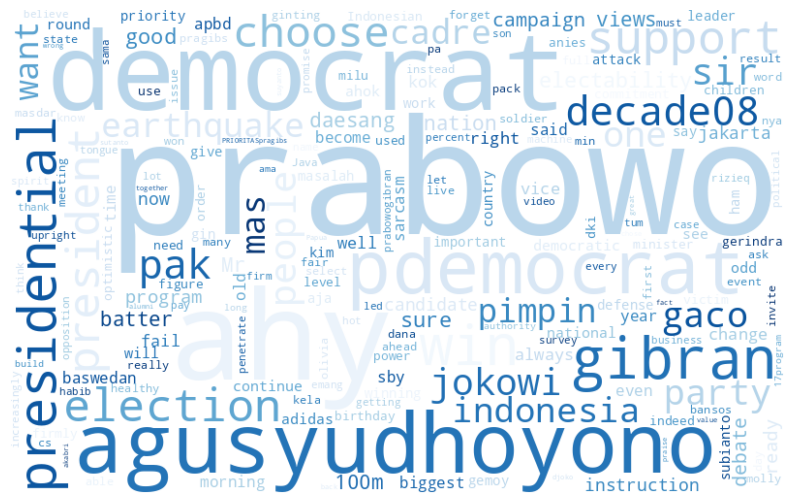

In [17]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_word=' '.join([text for text in data['tweet_english']])
wordcloud = WordCloud(
    width=800,
    height=500,
    background_color='white',
    collocations=False,
    colormap='Blues_r',
    stopwords=STOPWORDS
    ).generate(all_word)
plot_wordcloud(wordcloud)

In [19]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 156
Netral = 102
Negatif = 49

Total Data : 307


In [20]:
data['klasifikasi'] = status
data

,Unnamed: 0,full_text,tweet_english,klasifikasi
0,0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...,Negatif
1,1,menhan prabowo subianto abdi korban prajurit t...,minister of defense prabowo subianto servant o...,Negatif
2,2,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...,Positif
3,3,ahy demokrat siap kawal menang prabowo gibran ...,ahy democrat ready to control winning prabowo ...,Positif
4,4,kelola lingkung lanjut komitmen prabowo gibran...,manage the environment further commitment prab...,Positif
...,...,...,...,...
302,302,sama pak mas silaturahmi kyai ulama amp santri...,with Mr. Kyai ulama & santri ponpes miftahul h...,Netral
303,303,sdhlah sdh lalu bukti makan ego sendiri pak pr...,sdhlah sdh then evidence of eating his own ego...,Positif
304,304,elektabilitas prabowo gibran selalu unggul ahy...,electability prabowo gibran always superior ah...,Positif
305,305,jir striker prabowo,jir striker prabowo,Netral


In [24]:
dataset = data[['tweet_english', 'klasifikasi']]
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [25]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [26]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akurasi Test: ", cl.accuracy(dataset))

Akurasi Test:  0.7785016286644951


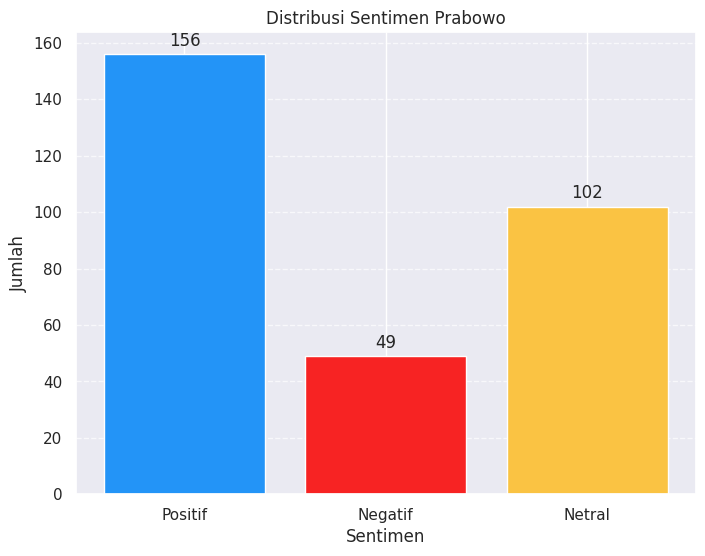

In [27]:

# Set tema seaborn untuk tampilan yang lebih profesional

sns.set_theme()
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]
def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])
    # Menambahkan keterangan presentase
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), # 3 points vertical offset
                     textcoords='offset points',
                     ha='center', va='bottom')

    # Menambahkan grid

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    # Menambahkan label sumbu dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)
    plt.show()


show_bar_chart(labels, counts, "Distribusi Sentimen Prabowo")